In [1]:
import os
pwd=os.getcwd()

filepath=os.path.join(pwd,'dataset/Netflix Userbase.csv').replace('\\','/')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [5]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


From above information we come to know that the minimum age of customer is around 26 and maximum age is 51

In [8]:
df.describe(include=object)

,Subscription Type,Join Date,Last Payment Date,Country,Gender,Device,Plan Duration
count,2500,2500,2500,2500,2500,2500,2500
unique,3,300,26,10,2,4,1
top,Basic,05-11-22,28-06-23,United States,Female,Laptop,1 Month
freq,999,33,164,451,1257,636,2500


In [9]:
df.shape

(2500, 10)

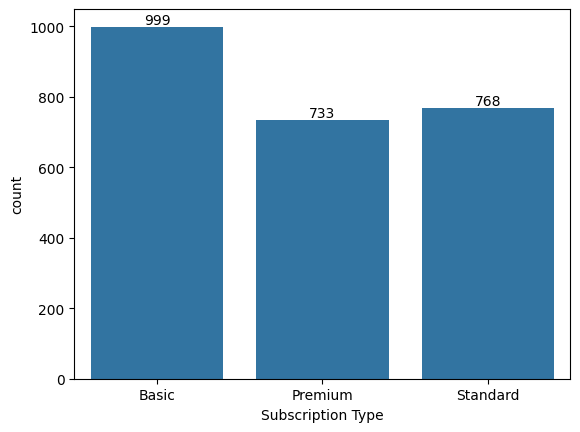

In [10]:
ax=sns.countplot(data=df,x='Subscription Type')
for bars in ax.containers:
    ax.bar_label(bars)


From above information we come to know that the minimum customer has Premium  subscription type  and maximum customer has Basic subscription type

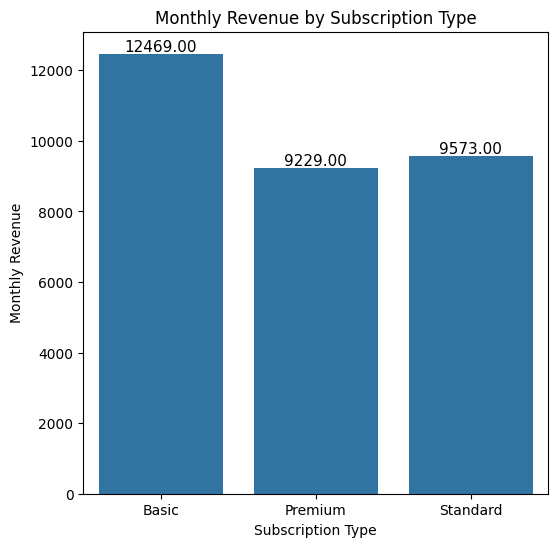

In [11]:
df1= df.groupby('Subscription Type')['Monthly Revenue'].sum().reset_index()


plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Subscription Type', y='Monthly Revenue', data=df1)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')

plt.show()

From chart it shows that maximum monthly incomes comes from Basic Subscription plan

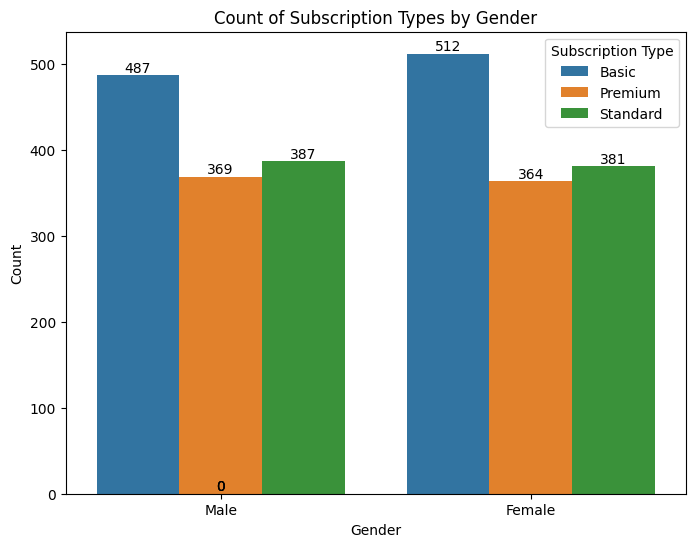

In [16]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Gender', hue='Subscription Type')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.title('Count of Subscription Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Subscription Type')
plt.show()

From the graph it shows that there are more female user than male

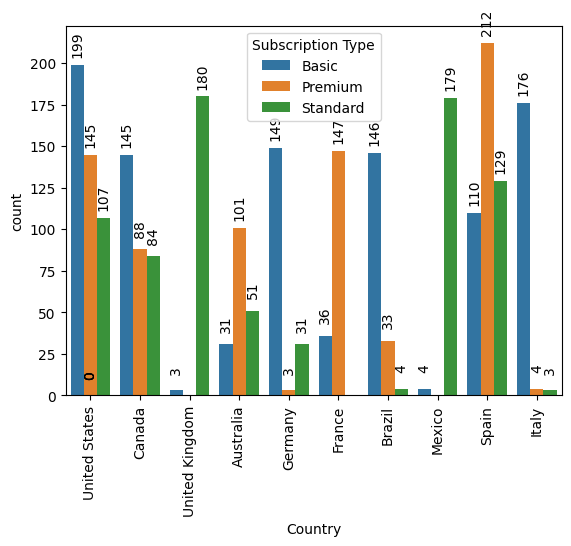

In [32]:
ax=sns.countplot(data=df, x='Country', hue='Subscription Type')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,15),
                   textcoords = 'offset points', rotation=90)
plt.xticks(rotation=90)
plt.show()

From this graph it can be concluded that US and Spain has most user in the world. And Spain has highest number of users with premium subscription.

**Conclusion**

While Basic subscription is the most prevalent among users, it is the Premium subscription that contributes significantly to the overall revenue. Moreover, there is a gender imbalance in subscription distribution, with females comprising the majority of subscribers. Geographically, the United States and Spain stand out as key markets, with Spain showing a preference for higher-tier subscriptions. These insights can guide decision-making processes in product development, marketing strategies, and customer retention efforts.